# **Introduction**

This project uses a data set consisting of tweets about the Catalan referendum in Spain on Twitter, with attributes including basic information and emotional word counts of each tweet detected by different lexicons (Jiménez-Zafra et al., 2021) (refer to Appendix I for further description of attributes). A bar plot addresses performance differences between lexicons in detecting sentiment among tweets. In addition, the distribution of the author’s popularity among all tweets is illustrated by a histogram, distinguished by sentiments. 

In [1]:
# import libraries
import pandas as pd   # to deal with tabular data
import matplotlib.pyplot as plt   # to plot
import seaborn as sns   # to plot

In [2]:
# read in csv file using pd.read_csv() function, and define the dataset as variable df
df = pd.read_csv(
    'E:/Jupyter Notebooks/COMM327/Portfolio1/Catalan_Referendum_Twitter_corpus.csv',
    encoding='latin',
    delimiter=';',
)

#【encoding】
# Pandas can not read the file by the defalt encoding method 'utf-8', so set it to 'latin'

#【delimiter】
# This csv file employs semicolons as delimiter instead of the default which is comma, so set it to ';'

In [ ]:
# preview the first 5 rows of df
df.head()

,lang,retweet_count,favorite_count,is_quote_status,num_hashtags,num_urls,num_mentions,interval_time,positive_words_iSOL,negative_words_iSOL,positive_words_NRC,negative_words_NRC,positive_words_mlSenticon,negative_words_mlSenticon,verified_user,followers_count_user,friends_count_user,listed_count_user,favourites_count_user,statuses_count_user
0,es,0,0.0,False,2.0,0,0.0,tarde-noche,0.0,0.0,0.0,1.0,0,0.0,False,459.0,741.0,4.0,140.0,2880.0
1,es,0,1.0,False,1.0,1,0.0,tarde-noche,0.0,0.0,0.0,1.0,0,0.0,False,7995.0,996.0,194.0,10335.0,23859.0
2,es,3,5.0,False,1.0,1,0.0,tarde-noche,1.0,1.0,0.0,0.0,1,0.0,True,151704.0,2201.0,250.0,10321.0,229298.0
3,es,0,1.0,False,1.0,0,0.0,tarde-noche,0.0,0.0,0.0,0.0,0,0.0,False,2199.0,1641.0,7.0,2386.0,49363.0
4,es,0,0.0,False,2.0,1,0.0,tarde-noche,0.0,2.0,0.0,2.0,0,1.0,False,1319.0,170.0,22.0,962.0,2410.0


# **Overall Data Processing**

In [4]:
# drop all missing values via .dropna() method
df = df.dropna()

# refer to Appendix II for more explanation on this

In [5]:
# the original dataset is too huge to load in Jupyter Notebook (it took about 
# 10 minutes to load the whole dataset), so do a sampling via .sample() method
df = df.sample(1000).reset_index(drop=True)

# randomly extract 1000 observations
# reset indices via .reset_index() method
# drop original indices

In [6]:
# rename attributes to enhance readability
df = df.rename(
    columns={
        'favorite_count':'like_count',
        'favourites_count_user':'likes_count_user',
        'statuses_count_user':'tweets_count_user'
    }
)

#【1】
# 'favorite_count' and 'favourites_count_user' are inconsistent in spelling, 
# so make them more harmonious and concise.

#【2】
# make 'statuses_count_user' more understandable

## **Setting Count Attributes**

In [ ]:
# check information of attributes and data types via .info() method
df.info()

# Knowing that: 

#【Count Attributes】
# All count attributes should have been int values, but now there are 
# three object attributes ('retweet_count','num_urls','positive_words_mlSenticon') 
# and several float attributes that need to be dealt with their data types.

#【Boolean Attributes】
# The data type of 'is_quote_status' and 'verified_user' attributes need to 
# be changed from object to bool.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   lang                       1000 non-null   object 
 1   retweet_count              1000 non-null   object 
 2   like_count                 1000 non-null   float64
 3   is_quote_status            1000 non-null   object 
 4   num_hashtags               1000 non-null   float64
 5   num_urls                   1000 non-null   object 
 6   num_mentions               1000 non-null   float64
 7   interval_time              1000 non-null   object 
 8   positive_words_iSOL        1000 non-null   float64
 9   negative_words_iSOL        1000 non-null   float64
 10  positive_words_NRC         1000 non-null   float64
 11  negative_words_NRC         1000 non-null   float64
 12  positive_words_mlSenticon  1000 non-null   object 
 13  negative_words_mlSenticon  1000 non-null   float6

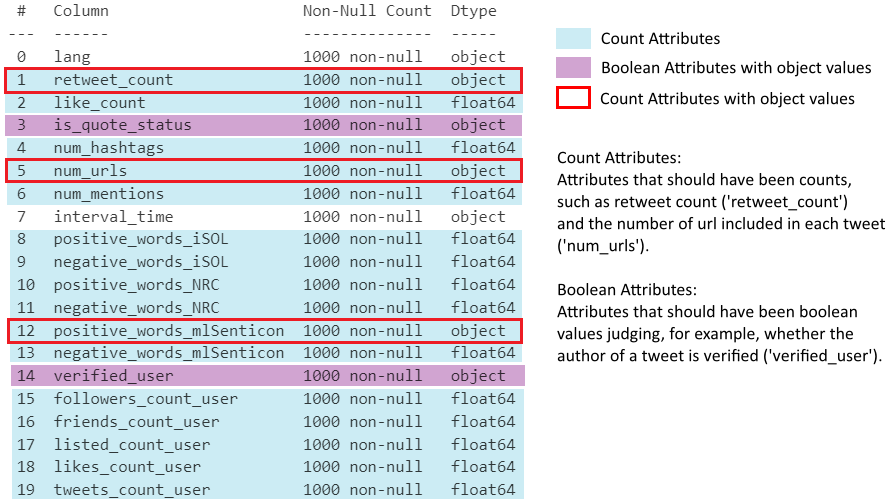

In [8]:
# three Count Attributes whose values should have been numbers instead of strings
df[['retweet_count','num_urls','positive_words_mlSenticon']].dtypes  

# check dtypes property of the three attributes to view their data type

retweet_count                object
num_urls                     object
positive_words_mlSenticon    object
dtype: object

In [9]:
# check if all strings in the three Count Attributes are numerical 
# to ensure that .astype() method can be used
print(
    df['retweet_count'].str.isnumeric().all(),
    df['num_urls'].str.isnumeric().all(),
    df['positive_words_mlSenticon'].str.isnumeric().all()
)

True True True


In [10]:
# change their data types from object to integer via .astype() method
df[['retweet_count',
    'num_urls',
    'positive_words_mlSenticon'
]] = df[['retweet_count','num_urls','positive_words_mlSenticon']].astype(int)

In [11]:
# change other Count Attributes' data type from float to integer
float_cols = df.select_dtypes(include='float').columns   # select all attributes with float values
df[float_cols] = df[float_cols].astype(int)   # change their data type to int

## **Setting Boolean Attributes**

In [12]:
# check if there are only two types of strings ('True' and 'False') in Boolean Attributes
print(df['is_quote_status'].unique())
print(df['verified_user'].unique())

['False' 'True']
['False' 'True']


In [13]:
# change their data type from string to boolean value via .map() method
df['is_quote_status'] = df['is_quote_status'].map({'True': True, 'False': False})
df['verified_user'] = df['verified_user'].map({'True': True, 'False': False})

# **Data Visualisation**

## **Bar Plot**

In [14]:
# melt all emotional word count attributes via .metl() method, to facilitate the visualisation
df_melted = df.melt(
    value_vars=[
        'positive_words_iSOL','negative_words_iSOL',
        'positive_words_NRC','negative_words_NRC',
        'positive_words_mlSenticon','negative_words_mlSenticon',
    ],
    var_name='sentiment_and_source',
    value_name='count',
)

#【emotional word count attributes】
# Attributes that contains positive/negative word counts of each tweet detected by three lexicons.

#【value_vars】
# Specifying the attributes to melt (unpivot), which are all emotional word count attributes.

#【var_name】
# Naming the new attribute that will store the original column labels, 
# which indicate both sentiment and source. 

#【value_name】
# Naming the new attribute that will hold the actual values from value_vars, 
# i.e., the counts of emotional words.

In [30]:
df_melted.head()  # initially melted dataframe, still need further editing

,count,sentiment,source
0,0,positive,iSOL
1,0,positive,iSOL
2,0,positive,iSOL
3,2,positive,iSOL
4,0,positive,iSOL


In [16]:
# define variables, determining whether an observation is positive or negative
is_positive = df_melted['sentiment_and_source'].str.contains('positive')
is_negative = df_melted['sentiment_and_source'].str.contains('negative')

# Each variable returns a boolean Series determining whether data of 'sentiment_and_source' attributes
# contain certain word ('positive'/'negative') in each observation.

In [17]:
# create a new attribute 'sentiment', storing sentiment status of each observation
df_melted.loc[df_melted[is_positive].index,'sentiment'] = 'positive'
df_melted.loc[df_melted[is_negative].index,'sentiment'] = 'negative'

#【the inner: df_melted[is_positive].index】
# is the indecis of all positive observations, and vice versa.

#【the outer: df_melted.loc[indices,'sentiment']='positive'】
# allocates a string 'positive' to each positive observation in a new column 'sentiment', and vice versa.

In [18]:
# define three other variables, determining which source an observation is from, ditto.
is_iSOL = df_melted['sentiment_and_source'].str.contains('iSOL')
is_NRC = df_melted['sentiment_and_source'].str.contains('NRC')
is_mlSenticon = df_melted['sentiment_and_source'].str.contains('mlSenticon')

In [19]:
# crete another new attribute 'source', storing the source lexicon of each observation, ditto.
df_melted.loc[df_melted[is_iSOL].index,'source'] = 'iSOL'
df_melted.loc[df_melted[is_NRC].index,'source'] = 'NRC'
df_melted.loc[df_melted[is_mlSenticon].index,'source'] = 'mlSenticon'

In [20]:
# remove the unnecessary attribute via .drop() method
df_melted = df_melted.drop(columns='sentiment_and_source')

In [29]:
df_melted.head()  # sentiment and source lexicon are now two seperate attributes

,count,sentiment,source
0,0,positive,iSOL
1,0,positive,iSOL
2,0,positive,iSOL
3,2,positive,iSOL
4,0,positive,iSOL


In [22]:
# set the overall theme of seaborn via .set_theme function
sns.set_theme(font='Calibri',font_scale=1.2,style='whitegrid')

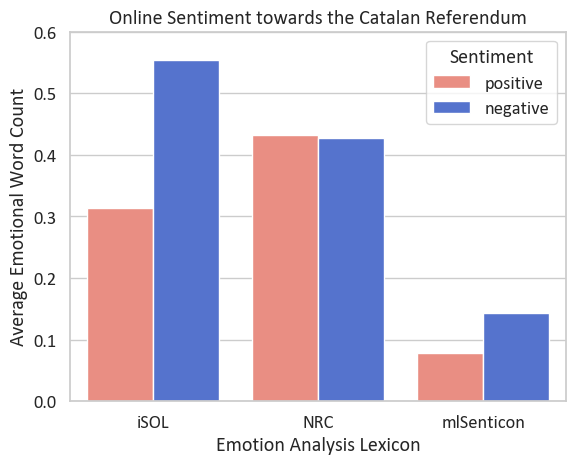

In [ ]:
# draw a bar plot via .barplot() function presenting mean emotional word counts from each source lexicon
sns.barplot(data=df_melted,x='source',y='count',
            hue='sentiment',palette=['salmon','royalblue'],errorbar=None,
)

#【palette】
# 'salmon' and 'royalblue' are both predefined colour names in matplotlib.
# To make colours more intuitive, a warm colour is assigned to positive sentiment, 
# and a cool colour to negative sentiment.

plt.title('Online Sentiment towards the Catalan Referendum')
plt.ylim(0,0.6)  # Setting the data range of y axis
plt.xlabel('Emotion Analysis Lexicon')
plt.ylabel('Average Emotional Word Count')
plt.legend(title='Sentiment')

plt.show()

This bar plot presents the average counts of emotional words detected from the selected tweets about the Catalan referendum, divided by three emotion analysis lexicons: iSOL, NRC, and mlSenticon. Positive and negative sentiments are distinguished by different colours, where a warm red colour ‘salmon’ is assigned to positive ones and a cool blue colour ‘royalblue’ to negative ones, which are two predefined colours in Matplotlib (List of named colors — Matplotlib 3.9.2 documentation, no date, sec. CSS Colors). They are moderate in saturation and intensity, avoiding eye strain of audiences (Wilke, 2019, chap. 19.1). Additionally, the colour assignment is intuitive because their temperature tendency typically corresponds to their allocated sentiments (Hanada, 2018), enhancing the ‘data-ink ratio’ of this plot (Wilke, 2019, chap. 23).

Overall, the number of negative words consistently exceeds that of positive ones, reflecting the relatively negative online public attitude towards the Catalan referendum. 

Regarding the performance of each lexicon, NRC possibly has the most balanced performance in determining the emotional tendency of discourse reflected by the bar chart. Conversely, mlSenticon is likely less effective in this work, inferred from its lowest figure for both sentiments. 


## **Histogram**

The formula below is introduced to calculate the *popularity* (Riquelme and González-Cantergiani, 2016, pp. 6, 11) of tweet authors:   


$$
Popularity(i) = 1 - e^{-λ·Fi} 
$$

*Popularity* indicates how popular a user could be, where *e* is the base of the natural logarithm, λ is a constant. The introduction of *popularity* aims to create an attribute storing ratio data reasonably distributed in histograms, since the original ratio attributes (e.g. follower count) seem too scattered to view.

In [24]:
# define a function to calculate the popularity of authors
def calc_popularity(F1):
    result = 1 - 2.718 ** (-0.001*F1)
    return result

# variable F1: the number of followers of each author
# for convenience, e is approximated as 2.718; λ as 0.001

In [25]:
# creating a new attribute to store authors' popularity via .apply() method
df['popularity']=df['followers_count_user'].apply(calc_popularity)

# applying calc_popularity function to each value of the attribute 
# 'followers_count_user' to form a new attribute -- 'popularity'

In [26]:
# define another function to determine tweets' overall sentiment
def determ_sentiment(row):
    if row['positive_words_iSOL'] > row['negative_words_iSOL']:
        return 'positive'
    elif row['positive_words_iSOL'] < row['negative_words_iSOL']:
        return 'negative'
    else:
        return 'neutral'

In [27]:
# creating a new attribute to store tweets' overall sentiment
df['overall_sentiment']=df.apply(determ_sentiment,axis=1)

# applying determ_sentiment function to df to form a new attribute 'overall_sentiment'
# axis=1 means to apply the function along each observation

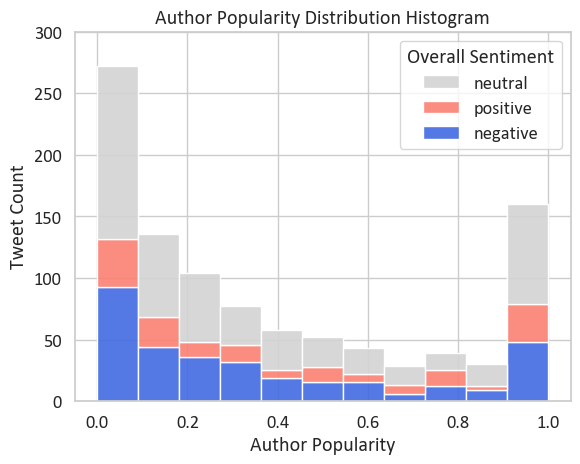

In [ ]:
# draw a histogram illustrating the distribution of author popularity
ax = sns.histplot(
    data=df,x='popularity',
    hue='overall_sentiment',
    hue_order=['neutral','positive','negative'],
    palette=['lightgray','salmon','royalblue'],  # intuitive colours
    multiple='stack',  # Letting groups stack in each bin
    alpha=0.9  # Setting the transparency of bins
)

# Setting the legend title of ax (see Appendix III for further explanation)
ax.get_legend().set_title('Overall Sentiment')  

plt.title('Author Popularity Distribution Histogram')
plt.xlabel('Author Popularity')
plt.ylabel('Tweet Count')
plt.ylim((0,300))  # Setting the data range of y axis

plt.show()

This histogram shows the distribution of author *popularity* among tweets, grouped by sentiments. Overall, most participants are at the lowest levels of *popularity*, and the number of tweets gradually decreases with the author *popularity* increasing, until the figure for *popularity* reaches its highest levels. Moreover, the majority of tweets are neutral, while negative contributions are more prevalent than positive ones.

# **Reflection**

These two plots only analyse a limited number of attributes in the dataset, where there is room for improvement. Other attributes could have also been employed in visualisation since their data types have been processed. For instance, basic information attributes such as retweet count and like count can be used to estimate the engagement of each tweet, with a histogram as visualisation.

# **Conclusion**

This project analyses the overall online attitude towards the Catalan referendum and compares three lexicons' performance by a bar plot, where the public attitude tends to be negative, and the NRC lexicon seems the most balanced. Additionally, users with lower *popularity* contributed the most presented by a histogram showing the distribution of user *popularity* divided by the attitude orientation of each tweet.  

# **Reference List**

Hanada, M. (2018) ‘Correspondence analysis of color–emotion associations’, *Color Research & Application*, 43(2), pp. 224–237. Available at: https://doi.org/10.1002/col.22171.  

Jiménez-Zafra, S.M. et al. (2021) ‘Catalan Referendum Twitter corpus’. Zenodo. Available at: https://doi.org/10.5061/dryad.stqjq2c24.  

List of named colors — Matplotlib 3.9.2 documentation (no date). Available at: https://matplotlib.org/stable/gallery/color/named_colors.html#css-colors (Accessed: 29 October 2024).  

Riquelme, F. and González-Cantergiani, P. (2016) ‘Measuring user influence on Twitter: A survey’, *Information Processing & Management*, 52(5), pp. 949–975. Available at: https://doi.org/10.1016/j.ipm.2016.04.003.  

Wilke, C.O. (2019) *Fundamentals of Data Visualization: A Primer on Making Informative and Compelling Figures.* Sebastopol: O’Reilly Media, Inc.


# **Appendix I: Description of Attributes**

**Below is the overall instruction of [the original dataset](https://zenodo.org/records/4750661) and description of each attribute offered by the dataset provider.**

>This corpus consists of 46,962 tweets related to the Catalan referendum, a very controversial topic in Spain due to it was an independence referendum called by the Catalan regional government and suspended by the Constitutional Court of Spain after a request from the Spanish government. All the tweets were downloaded on October 1, 2017 with the hashtags #CatalanReferendum or #ReferendumCatalan. Later, we collected features of these tweets on October 31, 2017 in order to analyze their virality. Each item in this collection is made up of the features we used from each tweet to perform the virality analysis.

**Tweet Information Attributes:**
* **lang:** Tweet language.  
* **retweet_count:** Total number of retweets recorded for a given tweet.  
* **favourite_count (renamed as 'like_count'):** Total number of favourites recorded for a given tweet.  
* **is_quote_status:** Whether a tweet includes a quote of another tweet.  
* **num_hashtags:** Total number of hashtags in the tweet.  
* **num_urls:** Total number of URLs in the tweet.  
* **num_mentions:** Total number of users mentioned in the tweet.  
* **interval_time:** Interval of the day on which the tweet was published (morning (06:00-12:00), afternoon (12:00-18:00), evening (18:00-00:00) or night (00:00-06:00)).  

**Emotional Word Count Attributes:**
* **positive_words_iSOL:** Total number of positive words found in the tweet using iSOL lexicon.  
* **negative_words_iSOL:** Total number of negative words found in the tweet using iSOL lexicon.  
* **positive_words_NRC:** Total number of positive words found in the tweet using NRC lexicon.  
* **negative_words_NRC:** Total number of negative words found in the tweet using NRC lexicon.      
* **positive_words_mlSenticon:** Total number of positive words found in the tweet using ML-SentiCon lexicon.  
* **negative_words_mlSenticon:** Total number of negative words found in the tweet using ML-SentiCon lexicon.  

**Author Information Attributes:**
* **verified_user:** Whether the tweet is from a verified user.  
* **followers_count_user:** Total number of users who follow the author of a tweet.  
* **friends_count_user:** Total number of friends that the author is following.   
* **listed_count_user:** Total number of lists that include the author of a tweet.   
* **favourites_count_user (renamed as 'likes_count_user'):** Total number of favourited tweets by a user.   
* **statuses_count_user (renamed as 'tweets_count_user'):** Total number of tweets made by the author since the creation of the account.  

# **Appendix II: Validating Values Before Modifying Data Types**

In the beginning, only missing data of certain subsets were dropped via `.dropna()` method.   

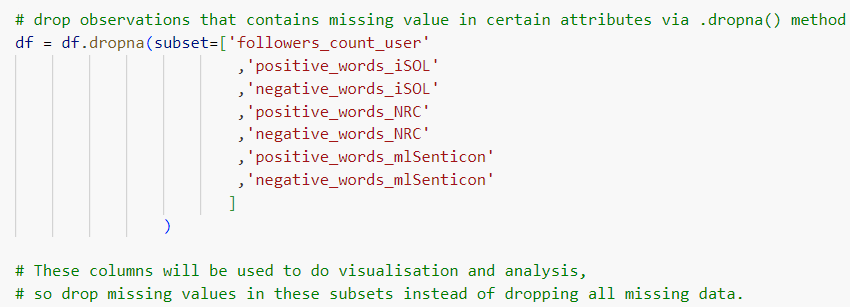

However, errors occurred subsequently when modifying data types via `.astype()` method.   

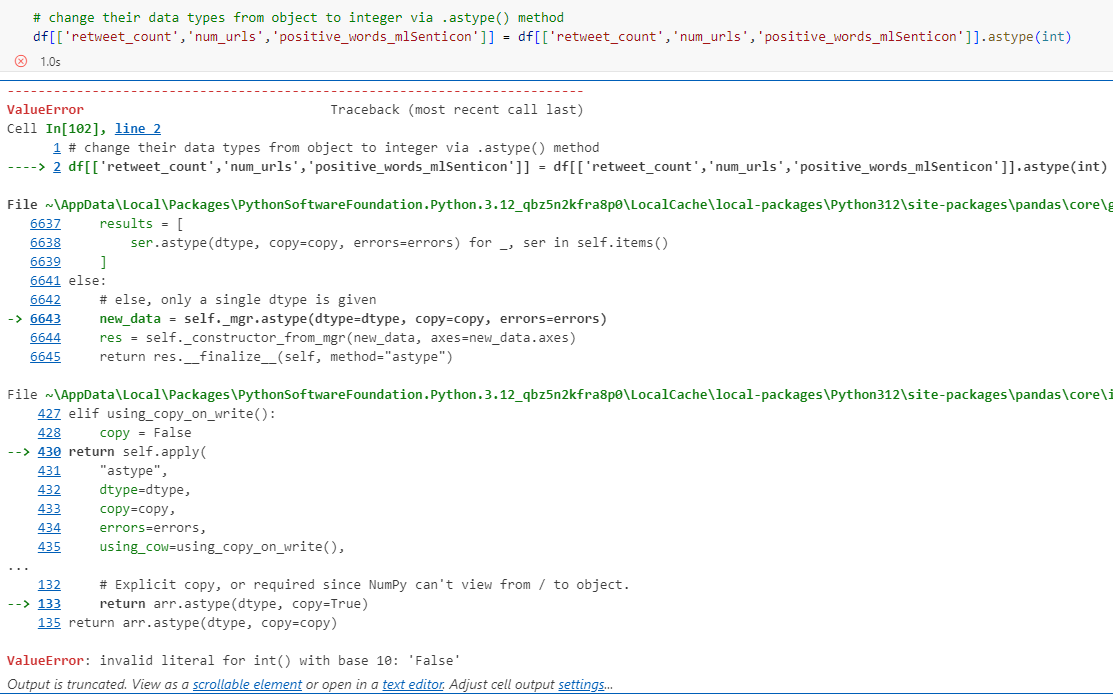

It was because the strings in those attributes were not all numerical, in which case the strings cannot be directly changed into integers via `.astype(int)`.   

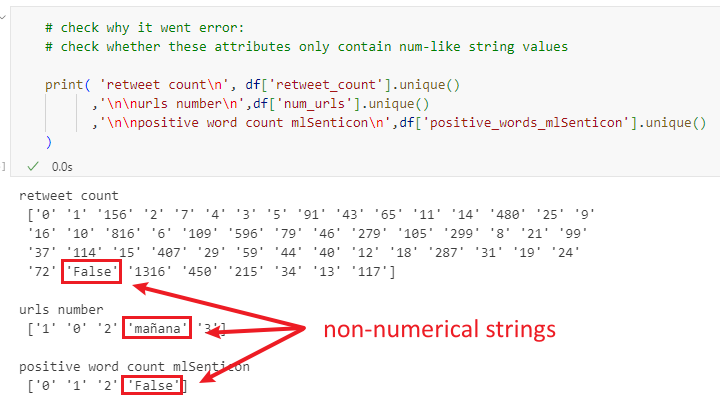

Therefore, it is necessary to check if all strings are numerical before applying methods to change the data type. Moreover, it was found that if all missing values were dropped initially via simply `.dropna()` (no keyword arguments), the probability of not returning errors would significantly increase.

# **Appendix III: Modifying Seaborn Histograms' Legend**

The histogram illustrating the distribution of author *popularity* was plotted via the seaborn function `.histplot()`, grouped in colours by defining the *hue* parameter. By this means, the legend was automatically generated, with the column label ‘overall_sentiment’ as the title. However, it does not make much sense as a title. The `plt.legend()` was thus employed aiming at changing the legend title and maintaining all other information. Nevertheless, it did not work perfectly with the legend as shown below. It is supposed that the error might be because there were conflicts between the legend automatically generated by Seaborn and the manually added legend via `plt.legend()` function. 

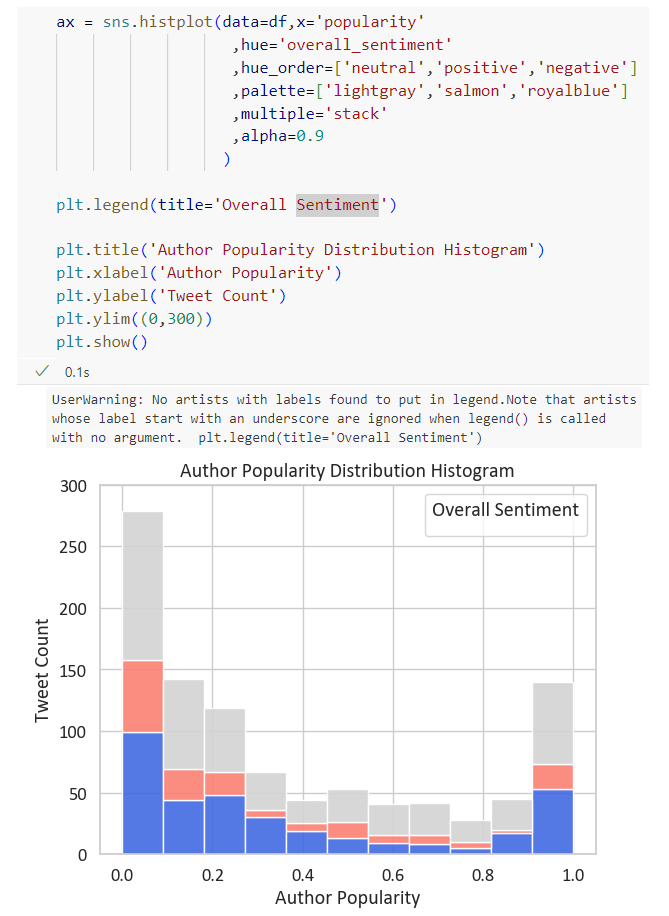

Therefore, the `plt.legend()` argument was changed into the `ax.get_legend().set_title()` argument, which detected the generated legend in this plot, and then set a new title to it.  